In [2]:
using DelimitedFiles
using Plots

In [3]:
A = readdlm("D:/julia-workspace/Profits.txt", ',', Float64, '\n')

97×2 Array{Float64,2}:
  6.1101  17.592
  5.5277   9.1302
  8.5186  13.662
  7.0032  11.854
  5.8598   6.8233
  8.3829  11.886
  7.4764   4.3483
  8.5781  12.0
  6.4862   6.5987
  5.0546   3.8166
  5.7107   3.2522
 14.164   15.505
  5.734    3.1551
  ⋮       
  8.5172   4.2415
  9.1802   6.7981
  6.002    0.92695
  5.5204   0.152
  5.0594   2.8214
  5.7077   1.8451
  7.6366   4.2959
  5.8707   7.2029
  5.3054   1.9869
  8.2934   0.14454
 13.394    9.0551
  5.4369   0.61705

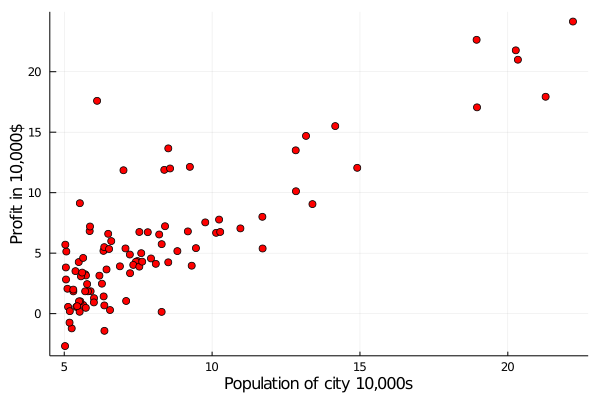

In [4]:
plot(A[:,1], A[:,2], color=:red, seriestype = :scatter, xlabel = "Population of city 10,000s" ,ylabel = "Profit in 10,000\$", labels = "")

In [5]:
y = A[:,2]

97-element Array{Float64,1}:
 17.592
  9.1302
 13.662
 11.854
  6.8233
 11.886
  4.3483
 12.0
  6.5987
  3.8166
  3.2522
 15.505
  3.1551
  ⋮
  4.2415
  6.7981
  0.92695
  0.152
  2.8214
  1.8451
  4.2959
  7.2029
  1.9869
  0.14454
  9.0551
  0.61705

In [6]:
N = length(y)

97

In [7]:
X = [ones(N) A[:,1]]

97×2 Array{Float64,2}:
 1.0   6.1101
 1.0   5.5277
 1.0   8.5186
 1.0   7.0032
 1.0   5.8598
 1.0   8.3829
 1.0   7.4764
 1.0   8.5781
 1.0   6.4862
 1.0   5.0546
 1.0   5.7107
 1.0  14.164
 1.0   5.734
 ⋮    
 1.0   8.5172
 1.0   9.1802
 1.0   6.002
 1.0   5.5204
 1.0   5.0594
 1.0   5.7077
 1.0   7.6366
 1.0   5.8707
 1.0   5.3054
 1.0   8.2934
 1.0  13.394
 1.0   5.4369

In [8]:
#normal equation: (theta = (X*X')^(-1)*X'*y)
θ_best = (X'*X)^(-1)*X'*y

2-element Array{Float64,1}:
 -3.895780878311886
  1.1930336441895961

In [9]:
a = X[75,:]
b = X[30,:]
u = a' * θ_best
v = b' * θ_best

22.593145123629718

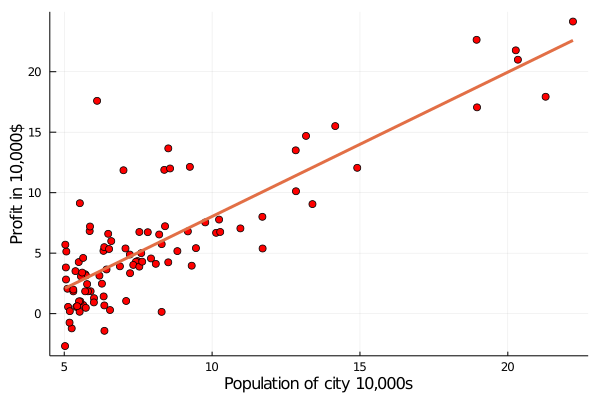

In [10]:
plot(A[:,1], A[:,2], color=:red, seriestype = :scatter, xlabel = "Population of city 10,000s" ,ylabel = "Profit in 10,000\$", labels = "")
plot!([a[2],b[2]], [u,v], labels = "", lw = 3)

In [11]:
#Use Gradient Descent algorith to estimate theta
#J = loss function
# function loss(x_i, y_i, θ)
#     prediction = x_i * θ
#     (prediction - y_i)^2
# end

function loss(X, y, θ)
    prediction = X*θ
    #sai so
    u = prediction - y
    return (u' * u)/length(y)
end

loss (generic function with 1 method)

In [12]:
J0 = loss(X,y,[0,0])

64.14546775491135

In [13]:
Jbest = loss(X,y,θ_best)

8.953942751950358

In [14]:
function bgd(X, y, α=0.01, maxIterations=1000)::Array{Float64,2}
    N, D = size(X)
    θs = zeros(D, maxIterations)
    for t = 1:maxIterations-1
        ∇ = X'*(X*θs[:,t]-y)/N
        θs[:, t+1] = θs[:,t] - α*∇
    end
    θs
end

bgd (generic function with 3 methods)

In [25]:
θs = bgd(X,y,0.01,3000)

2×3000 Array{Float64,2}:
 0.0  0.0583914  0.0628918  0.0578229  …  -3.87795  -3.87799  -3.87802
 0.0  0.653288   0.77001    0.791348       1.19124   1.19125   1.19125

In [22]:
T = 3000
θs = bgd(X,y, 0.01,T)
ts = collect(1:T)
Js = map(t->loss(X,y,θs[:,t]), ts)
Js

3000-element Array{Float64,1}:
 64.14546775491135
 13.474380929740018
 11.863187137209913
 11.802309414162776
 11.790457172888441
 11.780189886234664
 11.770008316887292
 11.759864960982835
 11.74975818952515
 11.739687823612773
 11.729653730625857
 11.719655779864363
 11.70969384114458
  ⋮
  8.954002519840072
  8.954002304559586
  8.95400209005452
  8.954001876322094
  8.95400166335952
  8.954001451164023
  8.954001239732845
  8.954001029063225
  8.954000819152428
  8.954000609997719
  8.954000401596371
  8.95400019394567

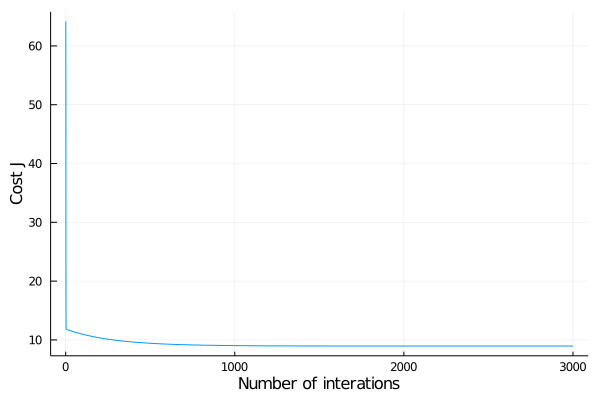

In [17]:
plot(ts,Js, xlabel = "Number of interations", ylabel = "Cost J",label = "")

In [58]:
θs[:,end]

2-element Array{Float64,1}:
 -3.895780820163418
  1.1930336383479525

In [61]:
θ_0 = -10:0.1:10
θ_1 = -1:0.1:1.5
f(u,v) = begin
    θ = [u; v]
    loss(X,y,θ)
end

f (generic function with 1 method)

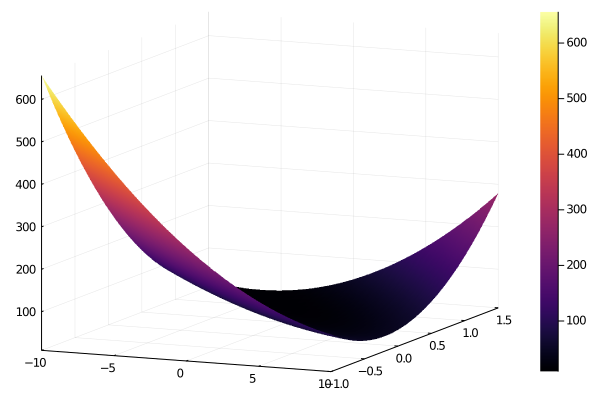

In [66]:
plot(θ_0,θ_1,f, st=:surface,camera =(-60,60))

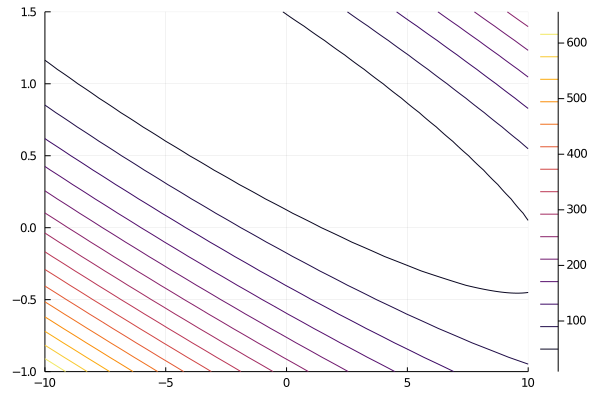

In [72]:
plot(θ_0,θ_1,f, st=:contour)

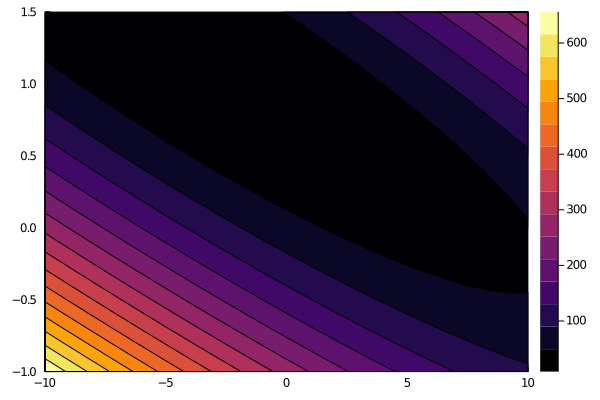

In [69]:
contour(θ_0,θ_1,f,fill=true)